In [1]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    matthews_corrcoef, confusion_matrix, roc_curve, auc
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [2]:
student_name = "Adya"
reg_number = "221AI006"
IMG_SIZE = (600, 600)
BATCH_SIZE = 32

In [3]:
# Load the trained model
model_path = r"D:\ActiveProjects\DL\Project_prefinal_submission_221AI006_221AI008\Models\fine_tune_efficientnetb7_transfer_learning.h5"
model = load_model(model_path)
print(f"Model loaded successfully from {model_path}")

Model loaded successfully from D:\ActiveProjects\DL\Project_prefinal_submission_221AI006_221AI008\Models\fine_tune_efficientnetb7_transfer_learning.h5


In [4]:
test_dir = r"D:\ActiveProjects\DL\Images\test"

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 420 images belonging to 21 classes.


In [ ]:
# Get actual labels from test_generator
y_true = test_generator.classes  # True class labels
class_labels = list(test_generator.class_indices.keys())  # Class names

# Predict on test data
y_pred_prob = model.predict(test_generator)  # Probability predictions
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

c:\Users\akhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/14 ━━━━━━━━━━━━━━━━━━━━ 8:52 41s/step

In [5]:
test_generator.reset()

# Measure testing time per sample
testing_times = []
y_true = []
y_pred = []
true_labels = []  # Store actual class names
pred_labels = []  # Store predicted class names

# Get class indices mapping
class_indices = test_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}  # Reverse mapping


In [6]:
print(index_to_class)

{0: 'agricultural', 1: 'airplane', 2: 'baseballdiamond', 3: 'beach', 4: 'buildings', 5: 'chaparral', 6: 'denseresidential', 7: 'forest', 8: 'freeway', 9: 'golfcourse', 10: 'harbor', 11: 'intersection', 12: 'mediumresidential', 13: 'mobilehomepark', 14: 'overpass', 15: 'parkinglot', 16: 'river', 17: 'runway', 18: 'sparseresidential', 19: 'storagetanks', 20: 'tenniscourt'}


In [ ]:

# Loop through all batches in test generator
for _ in range(len(test_generator)):  
    batch_x, batch_y = next(test_generator)  
    
    for i in range(len(batch_x)):  # Iterate through each sample in the batch
        start_time = time.time()
        pred = model.predict(np.expand_dims(batch_x[i], axis=0), verbose=0)
        end_time = time.time()
        
        testing_times.append(end_time - start_time)
        
        true_label_index = np.argmax(batch_y[i])  # Get true class index
        pred_label_index = np.argmax(pred)  # Get predicted class index
        
        y_true.append(true_label_index)
        y_pred.append(pred_label_index)
        
        true_labels.append(index_to_class[true_label_index])  # Convert index to label name
        pred_labels.append(index_to_class[pred_label_index])  # Convert index to label name

# Compute misclassified samples
misclassified_samples = sum(1 for t, p in zip(y_true, y_pred) if t != p)

# Compute average testing time
avg_testing_time = np.mean(testing_times)

print(f"Total Samples Tested: {len(y_true)}")
print(f"Misclassified Samples: {misclassified_samples}")
print(f"Average Testing Time per Sample: {avg_testing_time:.6f} seconds")

# Create DataFrame with true and predicted labels
testing_time_df = pd.DataFrame({
    "Sample": list(range(len(testing_times))),
    "Testing Time (seconds)": testing_times,
    "True Label": true_labels,
    "Predicted Label": pred_labels,
    "Misclassified": ["Yes" if t != p else "No" for t, p in zip(y_true, y_pred)]
})

# Append misclassification count to the file
testing_time_df.loc["Total Misclassified"] = ["-", "-", "-", "-", misclassified_samples]
testing_time_df.loc["Average Testing Time"] = ["-", avg_testing_time, "-", "-", "-"]


testing_time_file = f"{student_name}-{reg_number}-testingtime.xlsx"
testing_time_df.to_excel(testing_time_file, index=False)

print(f"Testing time, predictions, and misclassification count saved to {testing_time_file}")

In [7]:
# Calculate Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")
mcc = matthews_corrcoef(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)


In [8]:
# Print and Save Metrics
metrics_file = f"{student_name}-{reg_number}-metrics.txt"
with open(metrics_file, "w") as f:
    metrics_info = f"""
    Accuracy: {accuracy:.4f}
    Precision: {precision:.4f}
    Recall: {recall:.4f}
    F1 Score: {f1:.4f}
    Matthews Correlation Coefficient (MCC): {mcc:.4f}
    Confusion Matrix:\n{conf_matrix}
    """
    print(metrics_info)
    f.write(metrics_info)
print(f"Metrics saved to {metrics_file}")


    Accuracy: 0.8690
    Precision: 0.8786
    Recall: 0.8690
    F1 Score: 0.8685
    Matthews Correlation Coefficient (MCC): 0.8630
    Confusion Matrix:
[[19  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 3  0  0  0  0 13  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  0  0  7  1  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  1  2  0  0  0  0  0  0  1]
 [ 0  0  0  0  2  0  2  0  0  0  0  0 15  1  0  0  

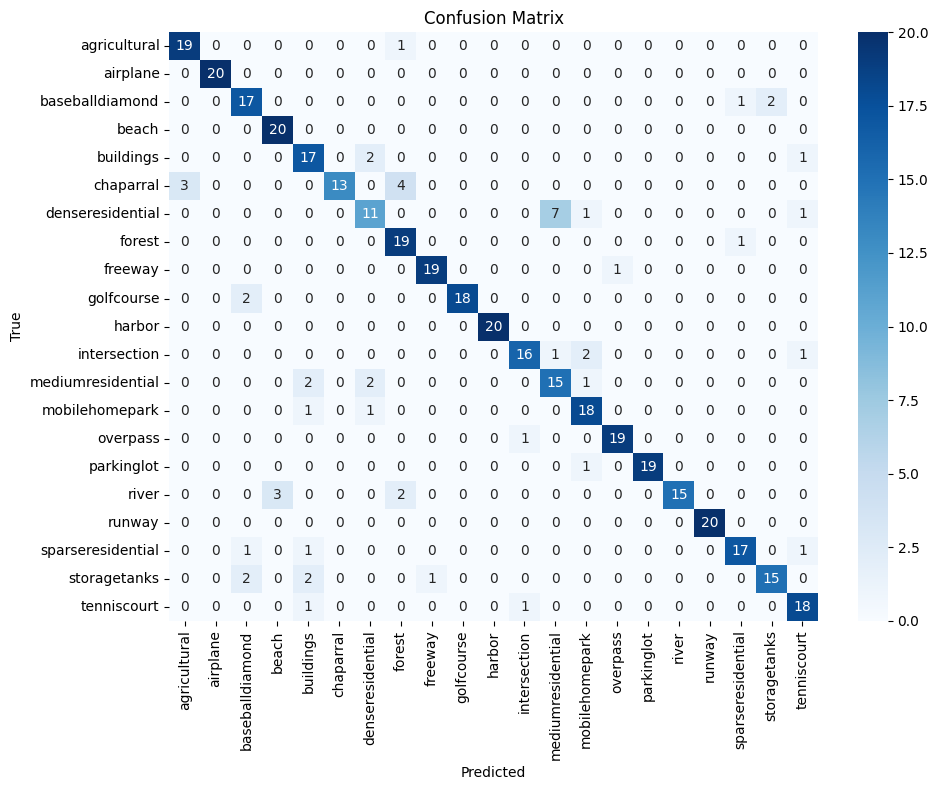

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [10]:
# Classification Report
class_report = classification_report(
    y_true, 
    y_pred, 
    target_names=list(test_generator.class_indices.keys())
)
print(class_report)

# Create CSV with predictions
file_paths = test_generator.filenames
csv_data = {
    'Image Name': file_paths,
    'True Class': [list(test_generator.class_indices.keys())[cls] for cls in y_true],
    'Predicted Class': [list(test_generator.class_indices.keys())[cls] for cls in y_pred]
}
prediction_df = pd.DataFrame(csv_data)
prediction_df.to_csv('classification_report.csv', index=False)
print("Predictions saved to predictions.csv")

                   precision    recall  f1-score   support

     agricultural       0.86      0.95      0.90        20
         airplane       1.00      1.00      1.00        20
  baseballdiamond       0.77      0.85      0.81        20
            beach       0.87      1.00      0.93        20
        buildings       0.71      0.85      0.77        20
        chaparral       1.00      0.65      0.79        20
 denseresidential       0.69      0.55      0.61        20
           forest       0.73      0.95      0.83        20
          freeway       0.95      0.95      0.95        20
       golfcourse       1.00      0.90      0.95        20
           harbor       1.00      1.00      1.00        20
     intersection       0.89      0.80      0.84        20
mediumresidential       0.65      0.75      0.70        20
   mobilehomepark       0.78      0.90      0.84        20
         overpass       0.95      0.95      0.95        20
       parkinglot       1.00      0.95      0.97       

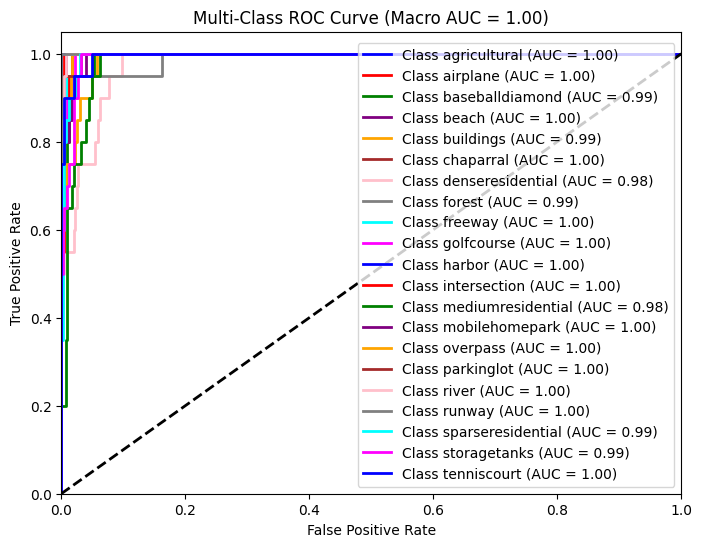

ROC curve saved to Adya-221AI006-lossgraph.jpeg

AUC Scores per Class:
Class agricultural: 0.9994
Class airplane: 0.9998
Class baseballdiamond: 0.9942
Class beach: 0.9996
Class buildings: 0.9896
Class chaparral: 1.0000
Class denseresidential: 0.9771
Class forest: 0.9910
Class freeway: 0.9983
Class golfcourse: 0.9971
Class harbor: 1.0000
Class intersection: 0.9968
Class mediumresidential: 0.9825
Class mobilehomepark: 0.9951
Class overpass: 0.9983
Class parkinglot: 0.9983
Class river: 0.9985
Class runway: 1.0000
Class sparseresidential: 0.9946
Class storagetanks: 0.9924
Class tenniscourt: 0.9957

Macro-Averaged AUC: 0.9952


In [11]:
# Reset test generator
test_generator.reset()

# Get class indices mapping
class_indices = test_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}  # Reverse mapping
num_classes = len(class_indices)

# Initialize lists
y_true = []
y_score = []

# Get true labels and predicted probabilities
for _ in range(len(test_generator)):  
    batch_x, batch_y = next(test_generator)
    preds = model.predict(batch_x, verbose=0)  # Get class probabilities
    
    y_true.extend(batch_y)  # Append true labels
    y_score.extend(preds)  # Append predicted probabilities

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_score = np.array(y_score)

# Binarize the true labels for multi-class ROC
y_true_bin = label_binarize(y_true.argmax(axis=1), classes=range(num_classes))

# Compute ROC and AUC for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan', 'magenta']
fpr_dict, tpr_dict, roc_auc_dict = {}, {}, {}

for i in range(num_classes):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc_dict[i] = auc(fpr_dict[i], tpr_dict[i])
    
    plt.plot(fpr_dict[i], tpr_dict[i], color=colors[i % len(colors)], 
             lw=2, label=f"Class {index_to_class[i]} (AUC = {roc_auc_dict[i]:.2f})")

# Compute macro-average AUC
macro_auc = np.mean(list(roc_auc_dict.values()))

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Multi-Class ROC Curve (Macro AUC = {macro_auc:.2f})")
plt.legend(loc="lower right")

roc_plot_filename = f"{student_name}-{reg_number}-lossgraph.jpeg"
plt.savefig(roc_plot_filename)
plt.show()

print(f"ROC curve saved to {roc_plot_filename}")

# Print AUC results
print("\nAUC Scores per Class:")
for i in range(num_classes):
    print(f"Class {index_to_class[i]}: {roc_auc_dict[i]:.4f}")

print(f"\nMacro-Averaged AUC: {macro_auc:.4f}")